In [1]:
!pip install scikit-learn

In [2]:
!pip install matplotlib


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [4]:
#load the dataset
data = pd.read_csv("vehicle.csv")
print(data)

             make    model vehicle_class  engine_size  cylinders transmission  \
0       Chevrolet   Accord         Coupe          1.9          6       Manual   
1             BMW    Camry     Hatchback          3.5          5       Manual   
2         Hyundai    Civic       Minivan          5.3          5          CVT   
3        Mercedes    Camry         Sedan          5.8          3    Automatic   
4       Chevrolet  Model Z         Sedan          2.0          5          CVT   
...           ...      ...           ...          ...        ...          ...   
100513    Hyundai   Accord           SUV          3.6          5          CVT   
100514     Toyota  Model X   Convertible          3.4         12       Manual   
100515    Hyundai    Camry         Coupe          2.3          5          CVT   
100516      Honda    Camry         Sedan          2.5          5    Automatic   
100517   Mercedes  Model X         Coupe          2.3          3    Automatic   

       fuel_type  fuel_cons

In [5]:
data["cylinders"].value_counts()

cylinders
12    14511
4     14483
10    14397
5     14342
3     14280
8     14280
6     14225
Name: count, dtype: int64

In [6]:
#identify categorical and numerical values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100518 entries, 0 to 100517
Data columns (total 12 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   make                              100518 non-null  object 
 1   model                             100518 non-null  object 
 2   vehicle_class                     100518 non-null  object 
 3   engine_size                       100518 non-null  float64
 4   cylinders                         100518 non-null  int64  
 5   transmission                      100518 non-null  object 
 6   fuel_type                         100518 non-null  object 
 7   fuel_consumption_city             100518 non-null  float64
 8   fuel_consumption_hwy              100518 non-null  float64
 9   fuel_consumption_comb (L/100 km)  100518 non-null  float64
 10  fuel_consumption_comb (mpg)       100518 non-null  float64
 11  co2_emissions                     100518 non-null  f

- Observation: Identifies data types (numerical/categorical) and detects missing values.


In [8]:
print(type(data))
print(data.shape)
print(data.size)

<class 'pandas.core.frame.DataFrame'>
(100518, 12)
1206216


In [9]:
len(data)

100518

In [10]:
#check missing values
data.isnull().sum()

make                                0
model                               0
vehicle_class                       0
engine_size                         0
cylinders                           0
transmission                        0
fuel_type                           0
fuel_consumption_city               0
fuel_consumption_hwy                0
fuel_consumption_comb (L/100 km)    0
fuel_consumption_comb (mpg)         0
co2_emissions                       0
dtype: int64

In [11]:
#check the duplicate values
duplicate_rows = data[data.duplicated()]
duplicate_rows

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb (L/100 km),fuel_consumption_comb (mpg),co2_emissions


In [12]:
#drop model and make columns
data = data.drop(columns=['make', 'model'])
data

,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb (L/100 km),fuel_consumption_comb (mpg),co2_emissions
0,Coupe,1.9,6,Manual,Diesel,18.5,5.2,11.8,19.9,236.2
1,Hatchback,3.5,5,Manual,Gasoline,8.5,9.7,9.1,25.8,209.1
2,Minivan,5.3,5,CVT,Diesel,6.6,5.0,5.8,40.6,127.4
3,Sedan,5.8,3,Automatic,Ethanol,5.4,7.9,6.6,35.6,149.8
4,Sedan,2.0,5,CVT,Gasoline,13.2,10.6,11.9,19.8,265.2
...,...,...,...,...,...,...,...,...,...,...
100513,SUV,3.6,5,CVT,Ethanol,9.9,7.1,8.5,27.7,197.9
100514,Convertible,3.4,12,Manual,Ethanol,19.7,6.1,12.9,18.2,260.2
100515,Coupe,2.3,5,CVT,Gasoline,10.0,14.4,12.2,19.3,289.1
100516,Sedan,2.5,5,Automatic,Ethanol,9.4,12.9,11.2,21.0,264.3


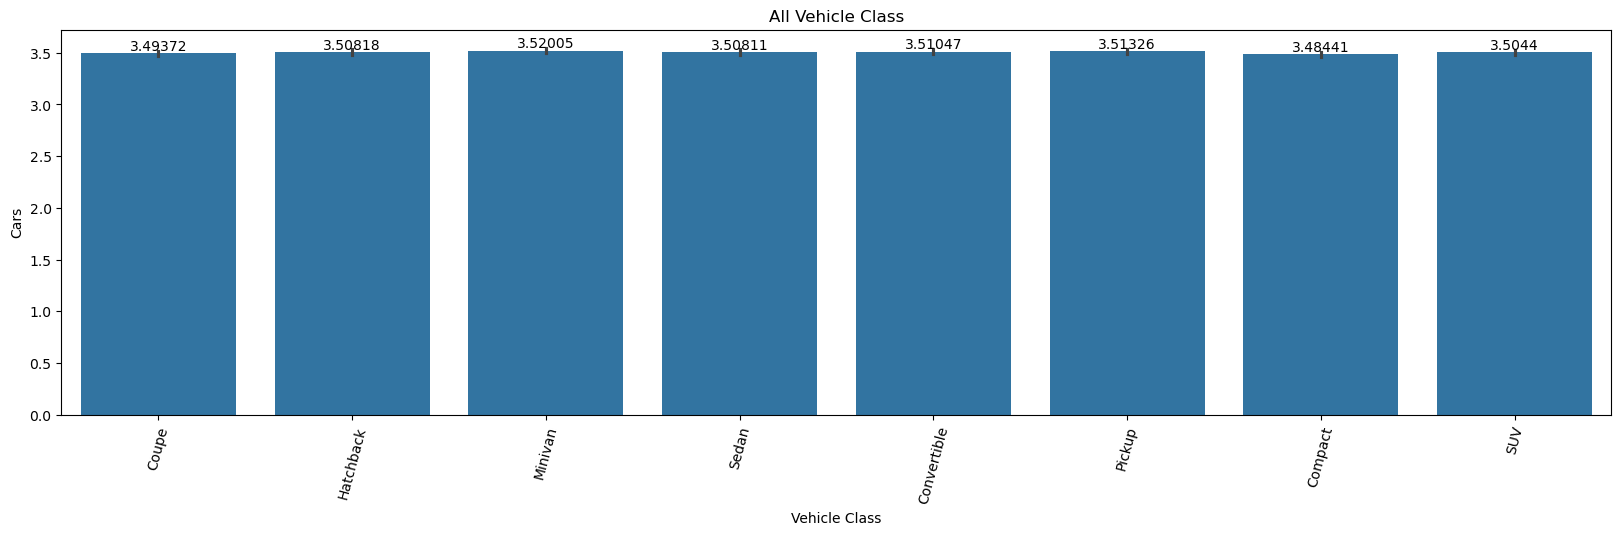

In [13]:
#visualazation
#Barplot for vehicle class
plt.figure(figsize=(20,5))
figure3 = sns.barplot(data = data, x = "vehicle_class",  y= "engine_size")
plt.xticks(rotation = 75)
plt.title("All Vehicle Class")
plt.xlabel("Vehicle Class")
plt.ylabel("Cars")
plt.bar_label(figure3.containers[0])
plt.show()

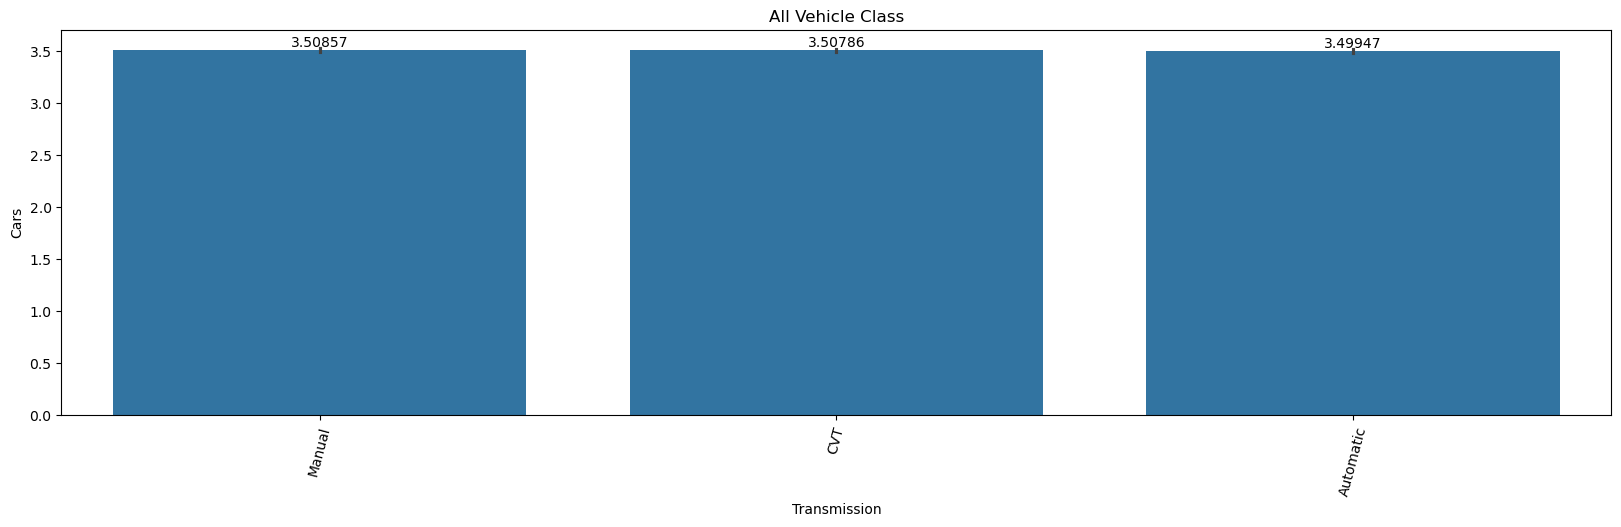

In [14]:
#Barplot for Transmission
plt.figure(figsize=(20,5))
figure3 = sns.barplot(data = data, x = "transmission",  y= "engine_size")
plt.xticks(rotation = 75)
plt.title("All Vehicle Class")
plt.xlabel("Transmission")
plt.ylabel("Cars")
plt.bar_label(figure3.containers[0])
plt.show()

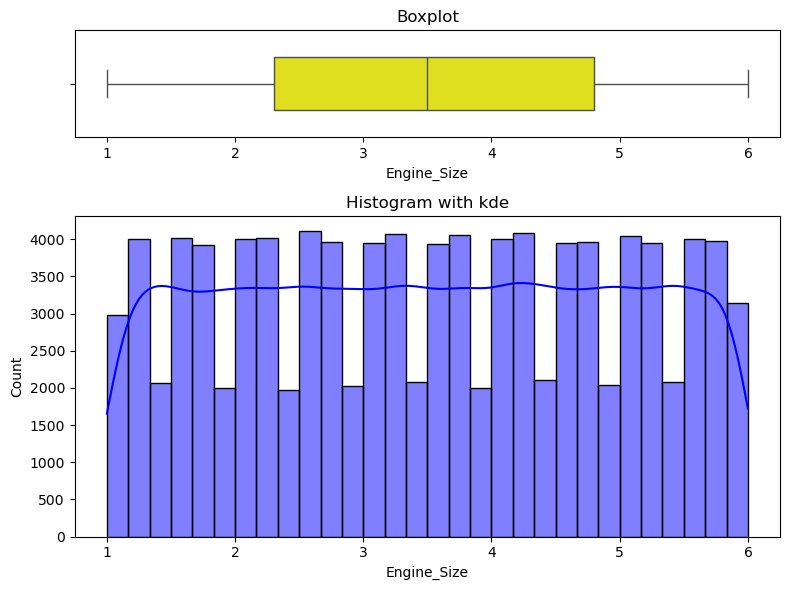

In [15]:
#Boxplot and Histogram for engine size
fig, axes = plt.subplots(2, 1,figsize=(8,6), gridspec_kw={'height_ratios':[1,3]})
sns.boxplot(data=data["engine_size"],ax=axes[0],color='yellow',width=0.5,orient = 'h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Engine_Size")
sns.histplot(data["engine_size"],kde=True, ax=axes[1],color='blue',bins=30)
axes[1].set_title("Histogram with kde")
axes[1].set_xlabel("Engine_Size")
plt.tight_layout()
plt.show()

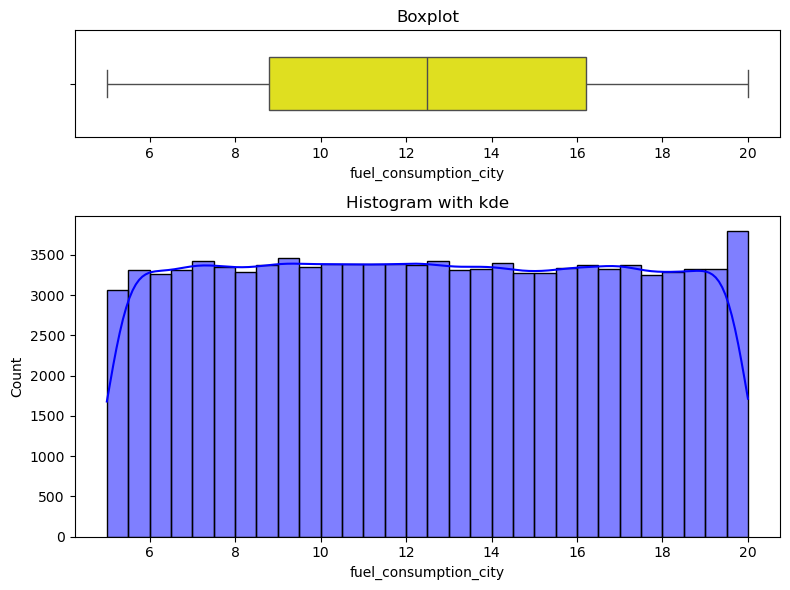

In [16]:
#Boxplot and Histogram for fuel consumption city
fig, axes = plt.subplots(2, 1,figsize=(8,6), gridspec_kw={'height_ratios':[1,3]})
sns.boxplot(data=data["fuel_consumption_city"],ax=axes[0],color='yellow',width=0.5,orient = 'h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("fuel_consumption_city")
sns.histplot(data["fuel_consumption_city"],kde=True, ax=axes[1],color='blue',bins=30)
axes[1].set_title("Histogram with kde")
axes[1].set_xlabel("fuel_consumption_city")
plt.tight_layout()
plt.show()

In [17]:
#one-hot-encoding for categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
data_encoded.to_csv("vehicle_encoded.csv", index=False)

In [18]:
#Separate the continous columns and perform standard scaling
numerical_cols = data.select_dtypes(include=['number']).columns
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
data.to_csv("vehicle_scaled.csv", index=False)

In [19]:
#concatenate the one-hot encoded categorical values with the scaled numerical columns
numerical_cols = data.select_dtypes(include=['number']).columns
categorical_cols = data.select_dtypes(include=['object']).columns
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data[numerical_cols]), columns=numerical_cols)
data_encoded = pd.get_dummies(data[categorical_cols], drop_first=True)
data_final = pd.concat([data_scaled, data_encoded], axis=1)
data_final.to_csv("vehicle_final.csv", index=False)

In [20]:
# Divide the data into x,y parts
X = data[['vehicle_class', 'engine_size', 'transmission', 'cylinders',
          'fuel_consumption_city', 'fuel_consumption_hwy',
          'fuel_consumption_comb (L/100 km)', 'fuel_type']]  

y = data['co2_emissions']
X = pd.get_dummies(X, drop_first=True)


In [21]:
#To split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
#To fit and train a Linear Regression Model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.07
R-squared: 0.93


In [24]:
#To fit and train a Lasso Regression model
lasso_model = Lasso(alpha=0.1) 
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [25]:
y_pred = lasso_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 0.23
Mean Squared Error (MSE): 0.08
R² Score: 0.92


In [26]:
#To fit and train a Ridge Regression model
ridge_model = Ridge(alpha=1.0) 
ridge_model.fit(X_train, y_train)

Ridge()

In [27]:
y_pred = ridge_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 0.22
Mean Squared Error (MSE): 0.07
R² Score: 0.93


In [28]:
##To fit and train a Ridge Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [29]:
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 0.22
Mean Squared Error (MSE): 0.07
R² Score: 0.93


In [30]:
#Deployment pkl file
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
joblib.dump(scaler, 'scale.pkl')

['scale.pkl']

In [31]:
joblib.dump(model, 'co2_emission_model.pkl')

['co2_emission_model.pkl']